In [ ]:
# The full dataset is 3.8 GB and very difficult to upload, download, work with, etc. We will split it into sub csvs to make it easier to work with

In [1]:
import pandas as pd

full_dataset = pd.read_csv("C:\\Users\\elanw\\Downloads\\DASHlink_full_fourclass_raw_comp.csv")

full_dataset.head()

,SampleID,TimeStep,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,...,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Label
0,0,0,81.261190,82.652336,-8.111792,1969.6174,155.57140,-2.109358,-0.692778,-4.952854,...,0.006664,70.74118,985.42550,-3.662262,0.785912,-0.390141,-1.081870,0.972379,12.625183,0.0
1,0,1,79.604095,81.015700,-7.644611,1955.6995,154.51205,-2.109358,-0.867216,-5.198349,...,0.007448,70.71775,985.52030,-3.665276,0.046774,-0.756234,-0.704820,0.770077,11.893839,0.0
2,0,2,81.302110,80.770200,-7.552573,1940.0267,153.32867,-2.109358,-1.424093,-4.830105,...,0.009604,70.70276,985.41650,-3.940319,0.804820,-1.325632,-0.240446,0.543937,12.559112,0.0
3,0,3,82.345470,83.900276,-8.395265,1924.5493,150.88818,-2.109358,-1.141912,-4.625526,...,0.009408,70.74159,984.81710,-4.275129,1.077102,-0.326884,-0.191627,1.062817,10.542998,0.0
4,0,4,81.874930,82.754620,-7.854284,1905.3670,150.69461,-2.109358,-0.724660,-4.400490,...,0.009408,70.57045,985.23065,-4.241483,1.654806,0.129545,-0.528425,0.867628,9.713539,0.0


In [2]:
print(full_dataset['SampleID'].min())

print(full_dataset['SampleID'].max())

0
99836


In [3]:
class_and_id = full_dataset[full_dataset['TimeStep'] == 159]

class_and_id = class_and_id[['SampleID', 'Label']].drop_duplicates()

class_and_id.head()


,SampleID,Label
159,0,0.0
319,1,0.0
479,2,0.0
639,3,0.0
799,4,0.0


Label
0.0    89663
1.0     7013
2.0     2207
3.0      954
Name: count, dtype: int64


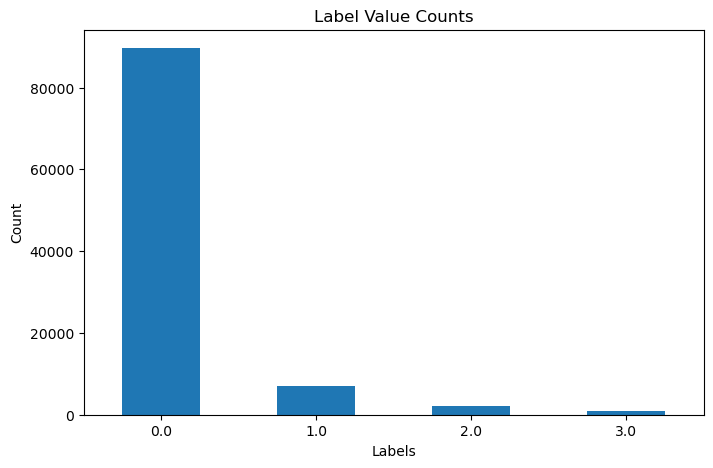

In [10]:
import matplotlib.pyplot as plt

label_counts = class_and_id['Label'].value_counts()
print(label_counts)


# Plot the bar graph
label_counts.plot(kind='bar', figsize=(8, 5))
plt.title("Label Value Counts")
plt.xlabel("Labels")
plt.ylabel("Count")
plt.xticks(rotation=0)  # Keep the labels horizontal
plt.show()

In [16]:
class_and_id.head()

,SampleID,Label
159,0,0.0
319,1,0.0
479,2,0.0
639,3,0.0
799,4,0.0


In [20]:
class_0 = class_and_id[class_and_id['Label'] == 0]
class_1 = class_and_id[class_and_id['Label'] == 1]
class_2 = class_and_id[class_and_id['Label'] == 2]
class_3 = class_and_id[class_and_id['Label'] == 3]

In [22]:
print(len(class_3))

954


In [24]:
import random
import numpy as np
import math

fourtyperc_of_3 = math.ceil((float)(class_3['SampleID'].size) * 0.4)
fourtyperc_of_2 = math.ceil((float)(class_2['SampleID'].size) * 0.4)
fourtyperc_of_1 = math.ceil((float)(class_1['SampleID'].size) * 0.4)
fourtyperc_of_0 = math.ceil((float)(class_0['SampleID'].size) * 0.4)
random_3s = random.sample(class_3['SampleID'].tolist(), fourtyperc_of_3)
random_2s = random.sample(class_2['SampleID'].tolist(), fourtyperc_of_2)
random_1s = random.sample(class_1['SampleID'].tolist(), fourtyperc_of_1)
random_0s = random.sample(class_0['SampleID'].tolist(), fourtyperc_of_0)


In [26]:
fourty_perc = all_training_indices = random_3s
fourty_perc.extend(random_2s)
fourty_perc.extend(random_1s)
fourty_perc.extend(random_0s)

In [32]:
random_2s = random.sample(random_2s, fourtyperc_of_3)
random_1s = random.sample(random_1s, fourtyperc_of_3)
random_0s = random.sample(random_0s, fourtyperc_of_3)

In [34]:
all_training_indices = random_3s
print(len(all_training_indices))
all_training_indices.extend(random_2s)
all_training_indices.extend(random_1s)
all_training_indices.extend(random_0s)
print(len(all_training_indices))

39937
41083


In [46]:
non_training_df = full_dataset[~full_dataset['SampleID'].isin(fourty_perc)]

print(len(non_training_df))
non_training_df.tail()

9584000


,SampleID,TimeStep,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,...,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Label
15973595,99834,155,83.122870,82.713715,-4.539935,675.93787,111.357240,-145.0185,-2.222453,-4.359573,...,-4.115986e-03,79.182510,1010.66100,-2.880626,-0.365749,-1.318209,-149.70172,0.978041,4.013760,3.0
15973596,99834,156,83.204704,82.202260,-4.371309,663.89410,111.413635,-145.0185,-1.914943,-4.318657,...,1.632874e-15,79.459730,1011.12080,-2.451697,0.198046,0.093274,-150.18170,1.035915,3.476750,3.0
15973597,99834,157,80.586075,81.731730,-3.543316,652.44840,111.846470,-145.0185,-1.382365,-4.195908,...,1.176000e-03,79.054955,1011.53467,-1.755218,1.300842,-1.469816,-150.59710,1.025178,2.279126,3.0
15973598,99834,158,85.005005,84.473100,-2.886944,644.21740,111.039220,-145.0185,-0.869284,-4.645985,...,-3.919768e-04,79.562940,1011.42865,-0.895541,2.314393,0.264904,-151.05537,1.091489,1.423625,3.0
15973599,99834,159,84.104860,84.841340,-2.833861,635.48580,109.919230,-145.0185,-0.343546,-4.584610,...,-7.839966e-04,76.185790,1011.25995,-0.558757,1.832946,-1.636158,-151.21005,1.019206,0.587311,3.0


In [38]:
training_df = full_dataset[full_dataset['SampleID'].isin(all_training_indices)]
print(len(training_df))

6389920


In [127]:
print(len(all_training_indices))

1534


In [129]:
print(len(not_training_idxs))

99837


In [40]:
non_training_df = full_dataset[full_dataset['SampleID'].isin(not_training_idxs)]
print(len(full_dataset))
print(len(non_training_df))

NameError: name 'not_training_idxs' is not defined

In [164]:
print(np.max(not_training_idxs))

3.0


In [184]:
print(not_training_idxs[3])

15821280    3.0
15821440    3.0
15821600    3.0
15821760    3.0
15821920    3.0
           ... 
15973120    3.0
15973280    3.0
15973440    3.0
15973600    3.0
15973760    3.0
Name: Label, Length: 954, dtype: float64


In [48]:
training_df.to_csv('training_flight_data.csv', index=False)  
#non_training_df.to_csv('nontraining_flight_data.csv', index=False)  

In [55]:
non_training_idxs = non_training_df['SampleID'].unique()
non_training_class_by_id = class_and_id[class_and_id['SampleID'].isin(non_training_idxs)]

In [57]:
non_training_df.head()
non_training_df_singlets = non_training_df[non_training_df['TimeStep'] == 0]
non_training_indices = pd.DataFrame(non_training_df_singlets['SampleID'])
non_training_labs = pd.DataFrame(non_training_df_singlets['Label'])

In [61]:
non_training_labs.tail()

,Label
15972800,3.0
15972960,3.0
15973120,3.0
15973280,3.0
15973440,3.0


In [63]:
from sklearn.model_selection import train_test_split


samp_ids = pd.DataFrame(non_training_class_by_id['SampleID'])
labs = pd.DataFrame(non_training_class_by_id['Label'])

X_valid, X_rest, y_valid, y_rest = train_test_split(non_training_indices, non_training_labs, test_size=0.83, random_state=33, shuffle=True, stratify=non_training_labs)
X_test, X_prod, y_test, y_prod = train_test_split(X_rest, y_rest, test_size = 0.8, random_state=33, shuffle=True, stratify=y_rest)

In [65]:
print(len(X_valid))
print(len(X_test))
print(len(X_prod))

10183
9943
39774


In [67]:
valid_df = full_dataset[full_dataset['SampleID'].isin(X_valid['SampleID'])]
print(len(valid_df))
test_df = full_dataset[full_dataset['SampleID'].isin(X_test['SampleID'])]
print(len(test_df))
prod_df = full_dataset[full_dataset['SampleID'].isin(X_prod['SampleID'])]
print(len(prod_df))

1629280
1590880
6363840


In [69]:
valid_df.to_csv('valid_flight_data.csv', index=False)  
test_df.to_csv('test_flight_data.csv', index=False)  
prod_df.to_csv('prod_flight_data.csv', index=False)  